# See the shapes of functions NNs learn based on their activation functions

In [1]:
import numpy as np
import torch
import torchsummary

import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm


In [2]:
class Network(torch.nn.Module):
    def __init__(self, fcs_sizes, nonlin):
        super(Network, self).__init__()
        fcs_sizes = [1]+fcs_sizes+[1]
        self.fcs = []
        for fc1, fc2 in zip(fcs_sizes[:-1], fcs_sizes[1:]):
            self.fcs.append(torch.nn.Linear(fc1, fc2))
        self.fcs = torch.nn.ModuleList(self.fcs)
        self.nonlin = nonlin
    def forward(self, X):
        for fc in self.fcs[:-1]:
            X = fc(X)
            X = self.nonlin(X)
        return self.fcs[-1](X)

In [3]:
torch.manual_seed(0)
net_sigmoid = Network([5,5,5], torch.sigmoid)
net_relu = Network([5,5,5], torch.relu)

# Results: 
## Sigmoid activation => smoother functions
## ReLU action => unsmooth piecewise functions

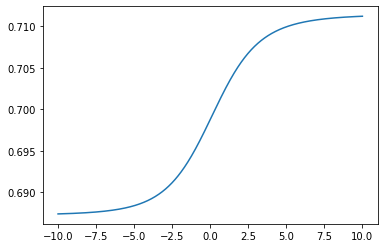

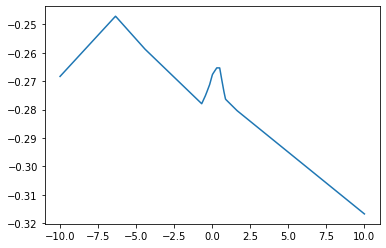

In [4]:
X = torch.linspace(-10, 10, 1000)[:, None]
Y = net_sigmoid(X)[:, 0]
plt.plot(X.numpy(), Y.detach().numpy())
plt.show()
Y = net_relu(X)[:, 0]
plt.plot(X.numpy(), Y.detach().numpy())
plt.show()